# Data Wrangling-Lending Club Data 2015Q1-2017Q4 #

##The purpose of this exercise is to inspect and clean the lending club data so that it is ready for my capstone project ##

The first step of the data wrangling process was importing the csv file into the python notebook. The columns were
in the second row of the file, so I set header = 1 in the call to pd.read_csv(). Once the data was imported into the 
notebook, the next step was to call .info() on all the columns in order to find null or mostly-null columns. By doing
this, it would enable me to begin narrowing down the amount of columns; this was necessary to do because the dataset 
was initally rather 'wide' with over 140 columns. The following columns were found to have zero or a negligible amount
of observations:

id, member_id, url, desc, revol_bal_joint, sec_app_earliest_cr_line, sec_app_inq_last_6mths, sec_app_mort_acc,
sec_app_open_acc, sec_app_revol_util, sec_app_open_act_il, sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths, 
sec_app_collections_12_mths_ex_med, and sec_app_mths_since_last_major_derog. I dropped the columns by putting them 
in a list, subsetting the dataframe, and calling .drop().

Even after dropping these columns, there will still well over 100 columns in the dataset. After careful deliberation,
I further reduced the dataframe to a subset of 25 columns:
    
var_of_interest = ['loan_amnt','int_rate','grade','emp_length','home_ownership',
'annual_inc','verification_status','loan_status','purpose','zip_code','addr_state','num_bc_tl',
'num_il_tl','num_rev_accts','dti','delinq_2yrs','pub_rec_bankruptcies','all_util','tax_liens',
'num_accts_ever_120_pd','pct_tl_nvr_dlq','percent_bc_gt_75','inq_last_12m','mo_sin_rcnt_tl']

loan_subset = loan16q1.loc[:,var_of_interest]

I chose loan_status to be the target variable. In addition, the other variables (such as grade, annual_inc, etc.) 
all seemed to be relevant and useful for predicting loan_status, so I chose them.

Printing out this new dataframe revealed that int_rate had been loaded in as an object type variable when it should 
have been float type. I removed the '%' symbol from the int_rate column and changed it to float type. I also noticed that 
emp_length was represented as a categorical rather than numerical variable. After careful consideration, I decided 
it would be more intuitive to convert these categories to their associated integer values. First, I replaced emp_length n/a
values with 'N/A'. I then converted the categories into numerical data. For example, 10+ years = 10, 2 years = 2, etc.
In addition, I converted 'N/A' values to zero. Through both of these steps some information was lost because N/A 
may not necessarily equal zero, '< 1 year' never equals 1 (although it will frequently be close),
and '10+ years' won't always equal 10. What I did here is called 'censoring', i.e., data points are above (10 years)
or below (1 year) a certain value, but it is unknown by how much. Although there was information lost through this approach,
I felt it was better than dropping the column entirely and thus losing all that useful information.


As was seen in the earlier call to .info(), there were numerous NaN values for various columns. After cleaning int_rate 
and emp_length, I began the process of NaN removal.There were 1129 NaN values for percent_bc_gt_75. however, this can explained by the fact that some borrowers probably don't have bankcard accounts. I therefore decided that if rows with NaN for percent_bc_gt_75 also displayed the value 0 for number of bankcard accounts (num_bc_tl), then I would replace NaN with the value 0 for percent_bc_gt_75. There were 241 rows saved as a result of this recoding. I then decided to remove the all the rows with the remaining NaN values for the sake of simplicity. The total amount of rows with NaN values (1034) was less than 1% of the entire row count (133887). it wouldn't be likely to result in a huge loss of information to delete these rows entirely. I also plotted describe() for selected variables in order to see if mean,min,max, etc. changed significantly as a result of row removal. I looped through loan_subset using var_of_interest variable list to determine which columns had NaN values, then dropped all remaining rows with NaN values from the entire loan_subset dataframe.

I then printed out descriptive statistics for selected columns to see if there was any significant effect on the 
statistics as a result of removing all the remaining rows with NaN values. A review of the descriptive statistics for the selected columns before and after NaN row removal revealed little change in the mean,std, min, etc. measures. the only noticeable difference was that the minimum value for annual_inc was now $200 instead of zero. In the context of such a large dataset that includes large income values into the millions of dollars, this was an inconsequential change.


I plotted histograms of all the numerical variables to inspect for possible problematic outliers.
Through inspection of the histograms in addition to descriptive statistics for each variable, it was
obvious that outliers were present for most of the variables. However, these outliers didn't appear to be a result
of data entry error, but rather as a result of random variation. Nevertheless, these outliers were so far from the 
other data points that they were not representative of the overall pattern of the rest of the data. I dealt with 
these outliers through the interquartile range outlier method (iqr), log transformation, or recoding the column as a binary variable. As shown in my code, some variables such as int_rate were made to have a more normal (and less skewed) distribution through the combination of log transformation and iqr outlier removal, solely using the iqr method (dti, all_util, loan_amnt, etc.), or through binary recoding (pub_rec_bankruptcies, tax_liens, etc.). For some variables, such as num_tl_bc, num_il_tl, and
num_rev_accts, it wouldn't have made sense to employ the iqr method or log transformation method as these distributions are inherently skewed to the right. These variables can never be less than zero. I therefore left these variables as-is.


For zip_code, the first three digits correspond to a sectional center facility (scf) which in turn corresponds to a U.S. metropolitan area or sub-region of a state (e.g. Dallas, San Francisco, Northern Vermont, etc.) I obtained an excel file
with these three-digit codes and their corresponding scfs; I wrote some code to extract the three-digit codes from each row
In zip_code, then mapped the geographical areas from the excel file to the zip_code column according to their three-digit code. This relabeling of zip_code from digits to sub-regions will allow for a more in-depth analysis by geographical area than just
using the addr_state column.


After the relabeling of zip_code the data wrangling process was finished. I have cleaned my data and made it suitable for 
statistical analysis and modeling in my capstone project.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
cd Desktop\Springboard Course

C:\Users\William\Desktop\Springboard Course


In [6]:
#loan2015 = pd.read_csv('LoanStats2015.csv', header = 1)

loan16q1 = pd.read_csv('LoanStats_2016Q1.csv', header = 1)

#loan16q2 = pd.read_csv('LoanStats_2016Q2.csv', header = 1)
#loan16q3 = pd.read_csv('LoanStats_2016Q3.csv', header = 1)
#loan16q4 = pd.read_csv('LoanStats_2016Q4.csv', header = 1)
#loan17q1 = pd.read_csv('LoanStats_2017Q1.csv', header = 1)
#loan17q2 = pd.read_csv('LoanStats_2017Q2.csv', header = 1)
#loan17q3 = pd.read_csv('LoanStats_2017Q3.csv', header = 1)
#loan17q4 = pd.read_csv('LoanStats_2017Q4.csv', header = 1)
#print(loan2015.columns)

#dict of dataframes maybe best way to go about consolidation

#loans = dict()

#for qtr in ['16Q1', '16Q2','16Q3','16Q4','17Q1','17Q2','17Q3', '17Q4']:
#    loans[qtr] = pd.read_csv('LoanStats_20'+ qtr +'.csv', header = 1)

#print(loans['16Q1'].columns)

#loans['16Q1']

C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#let's call .info() on all the columns in order to find null or mostly-null columns
#loans['16Q1'].iloc[:,0:100].info()
loan16q1.iloc[:,0:100].info()
loan16q1.iloc[:,101:len(loan16q1.columns)].info()
#id, member_id, url, desc, revol_bal_joint, sec_app_earliest_cr_line, sec_app_inq_last_6mths, sec_app_mort_acc,
#sec_app_open_acc, sec_app_revol_util, sec_app_open_act_il, sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths, 
#sec_app_collections_12_mths_ex_med, and sec_app_mths_since_last_major_derog are all entirely null 
#or almost entirely null values. Let's remove these columns.
#annual_inc_joint, dti_joint, verification_status_joint columns have at most 2661 non-null values.    
#hardship_type through hardship_last_payment_amount columns have at most 1009 non-null values.

#loan16q1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133889 entries, 0 to 133888
Data columns (total 100 columns):
id                                2 non-null object
member_id                         0 non-null float64
loan_amnt                         133887 non-null float64
funded_amnt                       133887 non-null float64
funded_amnt_inv                   133887 non-null float64
term                              133887 non-null object
int_rate                          133887 non-null object
installment                       133887 non-null float64
grade                             133887 non-null object
sub_grade                         133887 non-null object
emp_title                         124906 non-null object
emp_length                        133887 non-null object
home_ownership                    133887 non-null object
annual_inc                        133887 non-null float64
verification_status               133887 non-null object
issue_d                           133

In [7]:
#let's drop the null columns. these columns have zero or very few actual values
coldrplist = ['id', 'member_id', 'url', 'desc', 'revol_bal_joint', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc',
'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts','sec_app_chargeoff_within_12_mths', 
'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog']

loan16q1.drop(loan16q1.loc[:, coldrplist], inplace=True, axis=1)
loan16q1 = loan16q1.drop(loan16q1.index[-2:]) #these rows are making all columns display NaN as a unique value,
#so we should remove them


In [ ]:
#there are too many columns to analyze. we need to narrow down the dataframe.
#let's ascertain the variables we will work with.

In [8]:
#now we narrow down the dataframe to a manageable subset of about 25 columns of interest. loan_status will
#be our target variable. the other variables (such as grade, annual_inc, etc.) all seem to be relevant and 
#useful for predicting loan_status
var_of_interest = ['loan_amnt','int_rate','grade','emp_length','home_ownership',
'annual_inc','verification_status','loan_status','purpose','zip_code','addr_state','num_bc_tl',
'num_il_tl','num_rev_accts','dti','delinq_2yrs','pub_rec_bankruptcies','all_util','tax_liens',
'num_accts_ever_120_pd','pct_tl_nvr_dlq','percent_bc_gt_75','inq_last_12m','mo_sin_rcnt_tl']

loan_subset = loan16q1.loc[:,var_of_interest]

print(loan_subset.head())

   loan_amnt int_rate grade emp_length home_ownership  annual_inc  \
0    25000.0   11.99%     C    2 years            OWN     76000.0   
1    10000.0   14.46%     C        n/a           RENT     49000.0   
2    34000.0   15.31%     C  10+ years       MORTGAGE    150000.0   
3    15000.0    9.75%     B    5 years           RENT     85500.0   
4    20000.0   11.47%     B    3 years           RENT     60000.0   

  verification_status         loan_status             purpose zip_code  \
0            Verified         Charged Off         credit_card    337xx   
1            Verified         Charged Off  debt_consolidation    142xx   
2     Source Verified  Late (31-120 days)  debt_consolidation    140xx   
3        Not Verified             Current         credit_card    606xx   
4        Not Verified             Current         credit_card    953xx   

        ...          dti  delinq_2yrs  pub_rec_bankruptcies  all_util  \
0       ...        28.83          0.0                   0.0      73

In [9]:
#int_rate was loaded in as an object type variable when it should be float type. let's write some code here to remove 
#the '%' symbol from the int_rate column and change the column type from object to float type

# '%' is in the last position for each row, so we can access it this way
loan_subset['int_rate'] = loan_subset['int_rate'].str[:-1] 

#now that the percent sign is gone, we can convert the column to float
loan_subset['int_rate'] = loan_subset['int_rate'].astype('float')

print(loan_subset['int_rate'].head())
print(loan_subset[['int_rate']].describe()) #int_rate is now of float type


0    11.99
1    14.46
2    15.31
3     9.75
4    11.47
Name: int_rate, dtype: float64
            int_rate
count  133887.000000
mean       12.476372
std         4.829205
min         5.320000
25%         8.490000
50%        11.990000
75%        15.310000
max        28.990000


In [10]:
#printing the dataframe also reveals that emp_length is represented as a categorical rather than numerical variable
#it would be more intuitive to convert these categories to their associated integer values
loan_subset['emp_length'].value_counts() #unique category value counts before

#we will replace n/a values for emp_length with 'N/A'

#replace emp_length na's with 'N/A' based on emp_length == 'n/a'
loan_subset.loc[loan_subset['emp_length'] == 'n/a', 'emp_length'] = 'N/A'

print(loan_subset['emp_length'].value_counts())


#Now let's convert the emp_length categories into numerical data. For example, 10+ years = 10, 2 years = 2, etc.
#In addition, we will convert 'N/A' values to zero. Through both of these steps we lose some information because N/A 
#may not necessarily equal zero, '< 1 year' never equals 1 (although it will frequently be close),
#and '10+ years' won't always equal 10. What we are doing here is called 'censoring', i.e., data points are above (10 years)
#or below (1 year) a certain value, but it is unknown by how much.
loan_subset.replace('N/A', np.nan,inplace=True)
loan_subset.emp_length.fillna(value=0,inplace=True)
loan_subset['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
loan_subset['emp_length'] = loan_subset['emp_length'].astype(int)


print(loan_subset['emp_length'].value_counts())

10+ years    46347
2 years      11849
3 years      10735
< 1 year     10082
N/A           8944
1 year        8703
5 years       8062
4 years       7789
8 years       6330
6 years       5379
9 years       5202
7 years       4465
Name: emp_length, dtype: int64
10    46347
1     18785
2     11849
3     10735
0      8944
5      8062
4      7789
8      6330
6      5379
9      5202
7      4465
Name: emp_length, dtype: int64


In [ ]:
#as can be seen in the earlier printout of loan16q1.info(), there are numerous NaN values.
#now we begin the process of NaN removal 

In [61]:
#get amount of nan values in each column
print(loan_subset.isnull().sum())

#there are 1129 NaN values for percent_bc_gt_75. however, this can explained by the fact that some
#borrowers probably don't have bankcard accounts. if rows with NaN for percent_bc_gt_75 also display the value 0 
#for number of bankcard accounts (num_bc_tl), then we should replace NaN with the value 0 for percent_bc_gt_75.
print(loan_subset[(loan_subset['percent_bc_gt_75'].isnull()) & (loan_subset['num_bc_tl'] == 0)])

#there are 241 rows that meet this condition. we should therefore relabel NaN as 0 for these instances of percent_bc_gt_75

loan_amnt                   0
int_rate                    0
grade                       0
emp_length                  0
home_ownership              0
annual_inc                  0
verification_status         0
loan_status                 0
purpose                     0
zip_code                    0
addr_state                  0
num_bc_tl                   0
num_il_tl                   0
num_rev_accts               0
dti                        17
delinq_2yrs                 0
pub_rec_bankruptcies        0
all_util                   67
tax_liens                   0
num_accts_ever_120_pd       0
pct_tl_nvr_dlq              0
percent_bc_gt_75         1129
inq_last_12m               62
mo_sin_rcnt_tl              0
dtype: int64
        loan_amnt  int_rate grade  emp_length home_ownership  annual_inc  \
421        5000.0     10.75     B          10           RENT    25662.00   
498        8000.0     11.99     C           1           RENT    80000.00   
695        5000.0     16.29     D      

In [11]:
#replace NaN values in percent_bc_gt_75 with 0 when the conditions that percent_bc_gt_75 is null and num_bc_tl == 0 
#are both true
loan_subset.loc[np.logical_and(loan_subset['percent_bc_gt_75'].isnull(), loan_subset['num_bc_tl'] == 0), 'percent_bc_gt_75'] = 0

#reprinting the percent_bc_gt_75 column based on the two conditions afterwards confirms that the replacement worked.
#there are no more NaN values (when both these conditions are true)
print(loan_subset.loc[np.logical_and(loan_subset['percent_bc_gt_75'].isnull(), loan_subset['num_bc_tl'] == 0),'percent_bc_gt_75'])

print(loan_subset['percent_bc_gt_75'].isnull().sum()) #we saved 241 rows from deletion

Series([], Name: percent_bc_gt_75, dtype: float64)
888


In [117]:
print(loan_subset.isnull().sum()) #we have much fewer NaN values now. let's remove the all the rows with the remaining NaN values
print(loan_subset.count()) #as can be seen, the total amount of rows with NaN values (1034) is less than 1% of the entire row 
#count 133887. it will likely not result in a huge loss of information if we delete these rows entirely. we will also plot 
#describe() for selected variables in order to see if mean,min,max, etc. have changed significantly as a result of row removal.

loan_amnt                  0
int_rate                   0
grade                      0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
loan_status                0
purpose                    0
zip_code                   0
addr_state                 0
num_bc_tl                  0
num_il_tl                  0
num_rev_accts              0
dti                       17
delinq_2yrs                0
pub_rec_bankruptcies       0
all_util                  67
tax_liens                  0
num_accts_ever_120_pd      0
pct_tl_nvr_dlq             0
percent_bc_gt_75         888
inq_last_12m              62
mo_sin_rcnt_tl             0
dtype: int64
loan_amnt                133887
int_rate                 133887
grade                    133887
emp_length               133887
home_ownership           133887
annual_inc               133887
verification_status      133887
loan_status              133887
purpose                  133887
zip

In [20]:
#let's print out descriptive statistics for selected columns to see if there is any significant effect on the 
#statistics as a result of removing all the remaining rows with NaN values. These are the stats before NaN removal:
#let's create a sublist of the selected columns

var_sublist_before = ['loan_amnt','int_rate','grade','annual_inc','loan_status','purpose','dti','delinq_2yrs','pub_rec_bankruptcies',
'all_util','num_accts_ever_120_pd','percent_bc_gt_75']

#descriptive statistics before NaN removal:
for col in var_sublist_before:
    print(loan_subset[[col]].describe())

           loan_amnt
count  133887.000000
mean    15589.394041
std      8858.198349
min      1000.000000
25%      8400.000000
50%     14400.000000
75%     21000.000000
max     40000.000000
            int_rate
count  133887.000000
mean       12.476372
std         4.829205
min         5.320000
25%         8.490000
50%        11.990000
75%        15.310000
max        28.990000
         grade
count   133887
unique       7
top          B
freq     40267
         annual_inc
count  1.338870e+05
mean   8.046397e+04
std    7.808478e+04
min    0.000000e+00
25%    4.950000e+04
50%    6.800000e+04
75%    9.500800e+04
max    9.550000e+06
       loan_status
count       133887
unique           7
top        Current
freq         64251
                   purpose
count               133887
unique                  12
top     debt_consolidation
freq                 76687
                 dti
count  133870.000000
mean       19.547033
std         9.966931
min        -1.000000
25%        12.640000
50%        

In [12]:
#example of how to remove all nan values from a column
#x = loan16q1[['settlement_date']]
#y= x.dropna(how = 'any')
#print(y)

#loop through loan_subset using var_of_interest variable list to determine which columns have nan values.
#we will drop all remaining rows with NaN values from the entire loan_subset dataframe instead of replacing
#the NaNs with  alternative values

for col in var_of_interest:
    if loan_subset[[col]].isnull().values.any():
        print(str(col) + "  " + "contains NaN values: " + " " + str(loan_subset[[col]].isnull().values.any()))  

        
loan_subset = loan_subset.dropna(how = 'any')

print(" ")
print('Confirming NaN removal:')
for col in var_of_interest:
    if loan_subset[[col]].isnull().values.any():
        print(str(col) + "  " + "contains NaN values: " + " " + str(loan_subset[[col]].isnull().values.any()))
    else:
        break

print('All NaN values are removed!')


dti  contains NaN values:  True
all_util  contains NaN values:  True
percent_bc_gt_75  contains NaN values:  True
inq_last_12m  contains NaN values:  True
 
Confirming NaN removal:
All NaN values are removed!


In [31]:
#now we will print out descriptive statistics for selected columns to see if there is any significant effect on the 
#statistics as a result of removing all the remaining rows with NaN values. These are the stats after NaN removal:
#let's create a sublist of the selected columns

var_sublist_after = ['loan_amnt','int_rate','grade','annual_inc','loan_status','purpose','dti','delinq_2yrs','pub_rec_bankruptcies',
'all_util','num_accts_ever_120_pd','percent_bc_gt_75']

for col in var_sublist_after:
    print(loan_subset[[col]].describe())
    
#a review of the descriptive statistics for the selected columns before and after NaN row removal reveals little change in the
#mean,std, min, etc. measures. the only real noticeable difference is that minimum value for annual_inc is now $200 instead of 0.
#in the context of such a large dataset that includes large income values into the millions of dollars,
#this is an inconsequential change.

           loan_amnt
count  132918.000000
mean    15611.988406
std      8855.915934
min      1000.000000
25%      8500.000000
50%     14400.000000
75%     21000.000000
max     40000.000000
            int_rate
count  132918.000000
mean       12.464539
std         4.824084
min         5.320000
25%         8.490000
50%        11.990000
75%        15.310000
max        28.990000
         grade
count   132918
unique       7
top          B
freq     40029
         annual_inc
count  1.329180e+05
mean   8.051558e+04
std    7.777827e+04
min    2.000000e+02
25%    4.969487e+04
50%    6.800000e+04
75%    9.559700e+04
max    9.550000e+06
       loan_status
count       132918
unique           7
top        Current
freq         63853
                   purpose
count               132918
unique                  12
top     debt_consolidation
freq                 76190
                 dti
count  132918.000000
mean       19.554748
std         9.971417
min        -1.000000
25%        12.650000
50%        

In [ ]:
#let's plot histograms of all the numerical variables to inspect for possible problematic outliers
non_categorical_vars =['loan_amnt','int_rate','annual_inc','emp_length','dti','delinq_2yrs','pub_rec_bankruptcies',
'all_util','num_accts_ever_120_pd','percent_bc_gt_75','num_bc_tl','num_il_tl','num_rev_accts','tax_liens','pct_tl_nvr_dlq',
'inq_last_12m','mo_sin_rcnt_tl']


for i in non_categorical_vars:
    print(str(i))
    print(loan_subset[i].plot(kind = 'hist'))
    plt.show()

    

    

#through inspection of the histograms in addition to descriptive statistics provided in the previous cell, it is
#obvious that outliers are present for most of the variables. However, these outliers don't appear to be a result
#of data entry error, but rather as a result of random variation. Nevertheless, these outliers are so far from the
#other data points that are not representative of the overall pattern of the rest of the data. Let's remove/deal with 
#these outliers through the interquartile range method, log transformation, or recoding the column as a binary variable.
                

In [ ]:
#dti has a negative minimum value. dti should only have positive values, as negative debt isn't logical. 
#let's remove it to avoid any future issues. let's also remove zeros in order to allow log transformation if needed later

#remove negative min value 
#loan_subset = loan_subset[loan_subset['dti'] >= 0 ]

loan_subset = loan_subset[loan_subset['dti'] > 0 ]

print(loan_subset['dti'].describe())

In [108]:
#Log transformation on a pandas column

#df['log_column'] = np.log(df['column'])

df = loan_subset.copy()
#IQR functions transformation on a pandas column
import numpy as np
def filter_iqr_outliers_mask(data, iqr_multiple=1.5):
    # Returns an outlier mask (True==is outlier) using the IQR approach
    q1 = np.nanpercentile(data, 25)
    q3 = np.nanpercentile(data, 75)
    iqr = q3 - q1
    mask = (data >= q1 - iqr_multiple * iqr) & (q3 + iqr_multiple * iqr >= data)
    return mask
# Flag rows where column values is an IQR outlier
#is_outlier_mask = filter_iqr_outliers_mask(df['column_to_analyse'])
# Drop those rows
#df = df[is_outlier_mask==False]

mask = df['annual_inc'] == df['annual_inc'] #gives one True per row

#for col in ['annual_inc', 'colname2', 'colnameN']:
#    mask = mask & filter_iqr_outliers_mask(df[col])
 
varlist = ['loan_amnt','int_rate','annual_inc','dti','all_util','emp_length','percent_bc_gt_75']
for col in varlist:
    mask = mask & filter_iqr_outliers_mask(df[col])

df = df[mask]


#print(np.percentile(loan_subset['annual_inc'], 99))
#np.log(loan_subset[['annual_inc']]).describe() 
#np.log(loan_subset[['annual_inc']]).hist()

#lc = loan_subset.copy()
#is_outlier_mask = filter_iqr_outliers_mask(lc['int_rate'])

#lc = lc[is_outlier_mask==True]

#print(lc[is_outlier_mask==True])

loan_amnt
Axes(0.125,0.125;0.775x0.755)


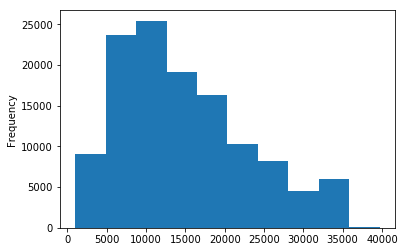

int_rate
Axes(0.125,0.125;0.775x0.755)


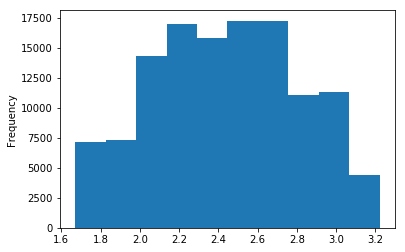

annual_inc
Axes(0.125,0.125;0.775x0.755)


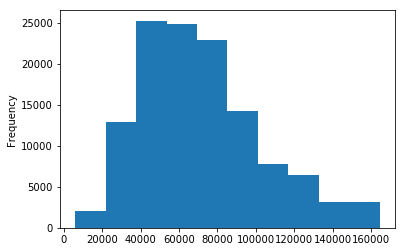

dti
Axes(0.125,0.125;0.775x0.755)


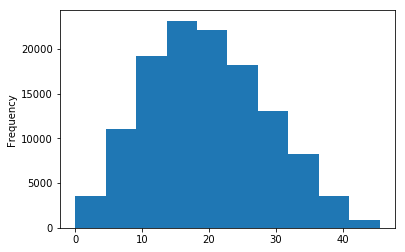

all_util
Axes(0.125,0.125;0.775x0.755)


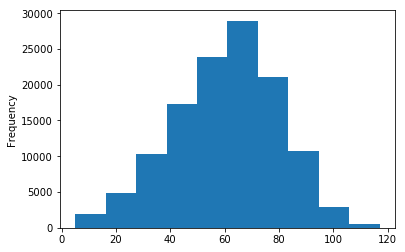

emp_length
Axes(0.125,0.125;0.775x0.755)


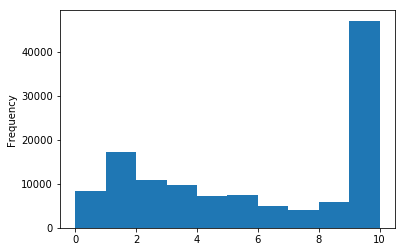

percent_bc_gt_75
Axes(0.125,0.125;0.775x0.755)


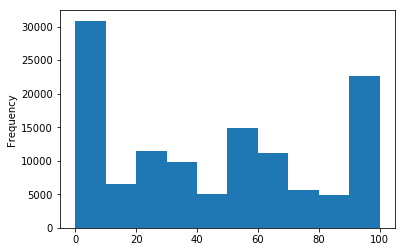

In [109]:
df['int_rate'] = np.log(df['int_rate'])
#df['loan_amnt'] = np.log(df['loan_amnt'])
#df['annual_inc'] = np.log(df['annual_inc'])


for i in varlist:
    print(str(i))
    print(df[i].plot(kind = 'hist'))
    plt.show()

(array([ 177.,  176.,  120.,   71.,   51.,   51.,   32.,   29.,   29.,
          18.,   14.,   17.,   16.,    7.,    5.,   10.,    7.,   10.,
           6.,    3.,    3.,    5.,    2.,    6.,    3.,    4.,    0.,
           1.,    1.,    0.,    3.,    0.,    1.,    0.,    3.,    2.,
           0.,    0.,    1.,    0.,    0.,    1.,    0.,    1.,    1.,
           0.,    0.,    1.,    0.,    1.]),
 array([  1.00000000e+00,   2.70000000e+01,   5.30000000e+01,
          7.90000000e+01,   1.05000000e+02,   1.31000000e+02,
          1.57000000e+02,   1.83000000e+02,   2.09000000e+02,
          2.35000000e+02,   2.61000000e+02,   2.87000000e+02,
          3.13000000e+02,   3.39000000e+02,   3.65000000e+02,
          3.91000000e+02,   4.17000000e+02,   4.43000000e+02,
          4.69000000e+02,   4.95000000e+02,   5.21000000e+02,
          5.47000000e+02,   5.73000000e+02,   5.99000000e+02,
          6.25000000e+02,   6.51000000e+02,   6.77000000e+02,
          7.03000000e+02,   7.29000000e+02

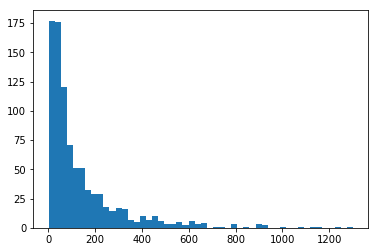

In [115]:

plt.hist(df['zip_code'].value_counts(), bins = 50)


In [ ]:
#recode the following variables as binary (0 = False, 1 = True)
#if you need to convert true/false explicitly to 0 or 1: df[col].astype(int)
loan_subset['delinq_2yrs_ever'] = loan_subset['delinq_2yrs'] > 0 #turn column into boolean series (ever been delinquent = 1 or not = 0)
loan_subset['bankruptcies_any'] = loan_subset['pub_rec_bankruptcies'] > 0 #turn column into boolean series (ever gone bankrupt = 1 or not = 0)
loan_subset['accts_ever_120_pd_any'] = loan_subset['num_accts_ever_120_pd'] > 0 #turn column into boolean series (any delinquent accts = 1 or none = 0)
loan_subset['tax_liens_any'] = loan_subset['tax_liens'] > 0 #turn column into boolean series (any tax liens = 1 or none = 0)

loan_subset.drop(['delinq_2yrs','pub_rec_bankruptcies','num_accts_ever_120_pd','tax_liens'],inplace=True, axis=1)

grade
Axes(0.125,0.125;0.775x0.755)


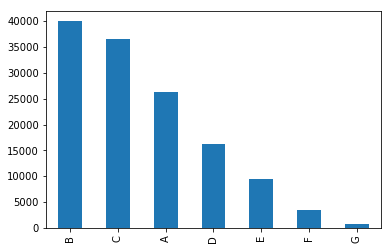

home_ownership
Axes(0.125,0.125;0.775x0.755)


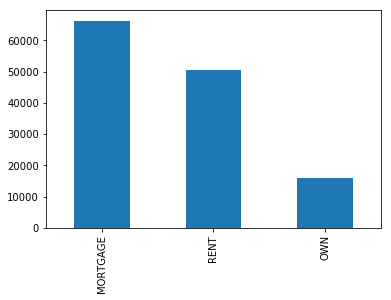

loan_status
Axes(0.125,0.125;0.775x0.755)


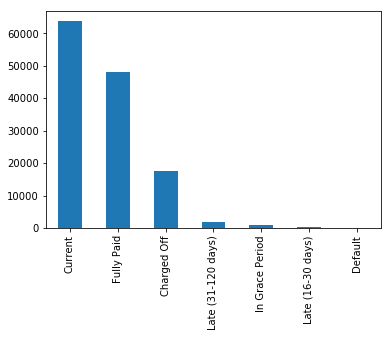

purpose
Axes(0.125,0.125;0.775x0.755)


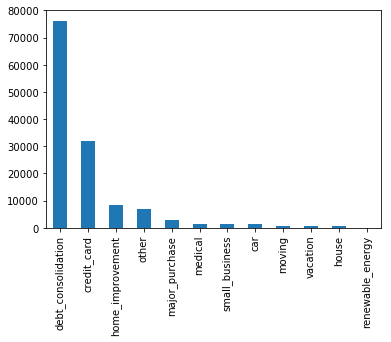

verification_status
Axes(0.125,0.125;0.775x0.755)


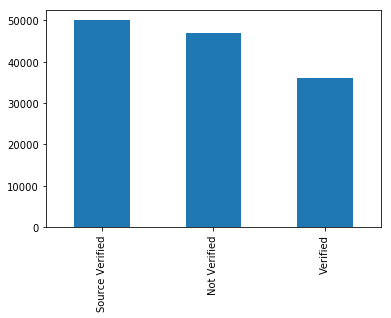

addr_state
Axes(0.125,0.125;0.775x0.755)


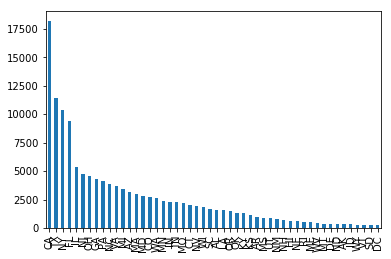

tax_liens_any
Axes(0.125,0.125;0.775x0.755)


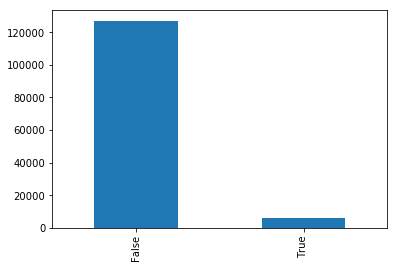

accts_ever_120_pd_any
Axes(0.125,0.125;0.775x0.755)


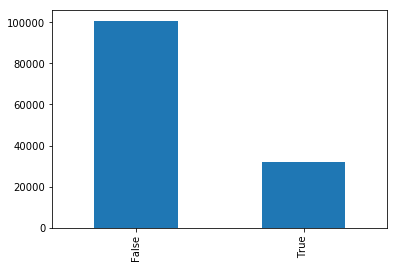

delinq_2yrs_ever
Axes(0.125,0.125;0.775x0.755)


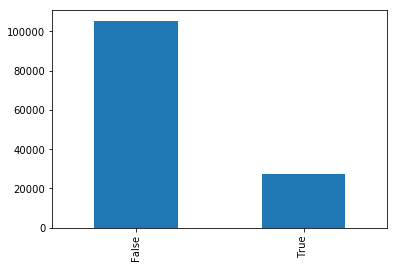

bankruptcies_any
Axes(0.125,0.125;0.775x0.755)


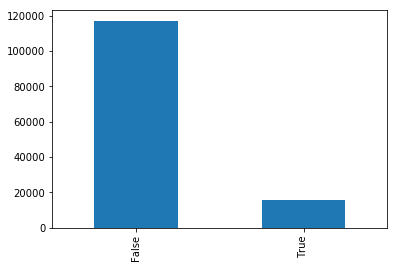

CA    18208
TX    11447
NY    10412
FL     9375
IL     5357
NJ     4787
OH     4564
GA     4275
PA     4177
NC     3862
VA     3659
MI     3474
AZ     3153
MA     3009
MD     2848
CO     2717
WA     2675
MN     2341
IN     2293
TN     2264
MO     2195
CT     1985
NV     1895
WI     1821
SC     1662
AL     1592
LA     1581
OR     1541
OK     1355
KY     1284
KS     1127
AR      995
MS      882
UT      861
NM      796
NH      674
HI      633
NE      619
RI      542
ME      526
WV      446
MT      382
DE      382
ND      357
AK      348
ID      338
WY      299
VT      295
SD      295
DC      283
Name: addr_state, dtype: int64


In [99]:

#now we'll plot all the categorical variables, except zip_code    


categorical_vars = ['grade', 'home_ownership','loan_status','purpose','verification_status','addr_state','tax_liens_any',
'accts_ever_120_pd_any','delinq_2yrs_ever','bankruptcies_any']

for v in categorical_vars:
    print(str(v))
    print(loan_subset[v].value_counts().plot(kind = 'bar'))
    plt.show()                   

print(loan_subset['addr_state'].value_counts())


loan_amnt
Axes(0.125,0.125;0.775x0.755)


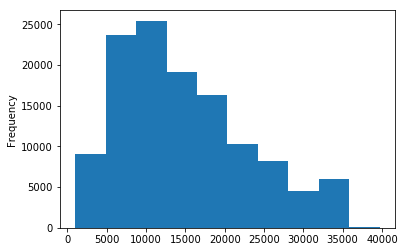

int_rate
Axes(0.125,0.125;0.775x0.755)


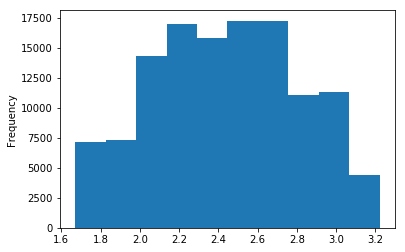

annual_inc
Axes(0.125,0.125;0.775x0.755)


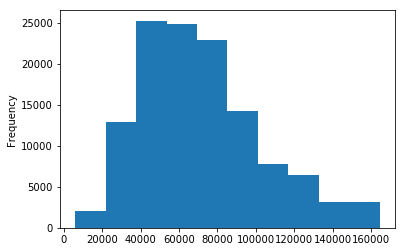

emp_length
Axes(0.125,0.125;0.775x0.755)


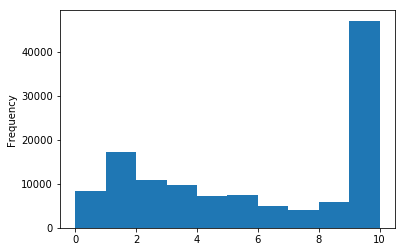

dti
Axes(0.125,0.125;0.775x0.755)


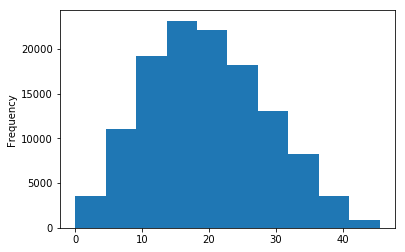

all_util
Axes(0.125,0.125;0.775x0.755)


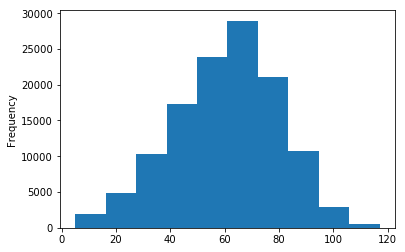

percent_bc_gt_75
Axes(0.125,0.125;0.775x0.755)


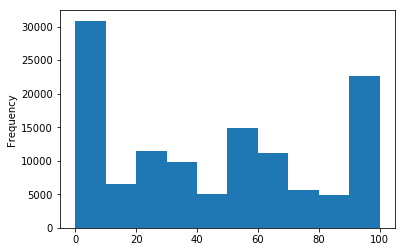

num_bc_tl
Axes(0.125,0.125;0.775x0.755)


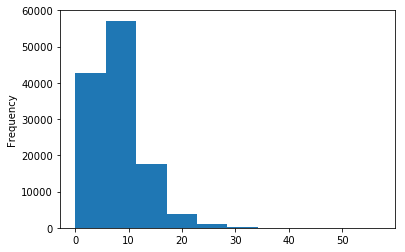

num_il_tl
Axes(0.125,0.125;0.775x0.755)


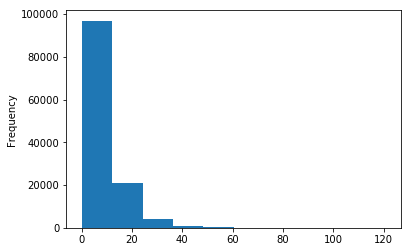

num_rev_accts
Axes(0.125,0.125;0.775x0.755)


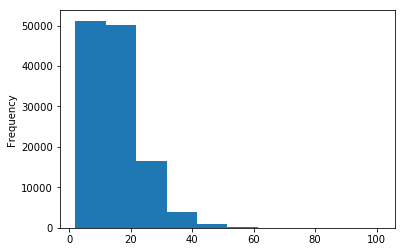

pct_tl_nvr_dlq
Axes(0.125,0.125;0.775x0.755)


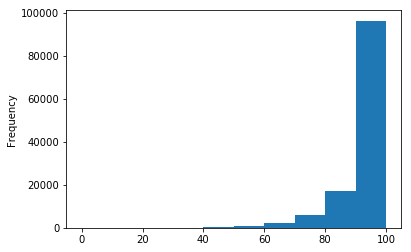

inq_last_12m
Axes(0.125,0.125;0.775x0.755)


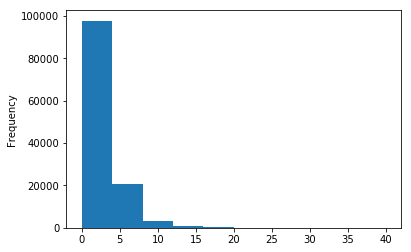

mo_sin_rcnt_tl
Axes(0.125,0.125;0.775x0.755)


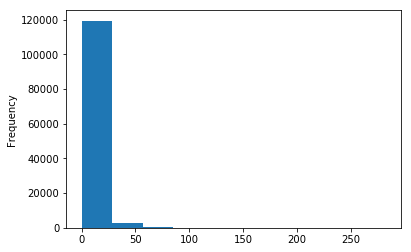

In [110]:
numerical_vars_final = ['loan_amnt','int_rate','annual_inc','emp_length','dti',
'all_util','percent_bc_gt_75','num_bc_tl','num_il_tl','num_rev_accts','pct_tl_nvr_dlq',
'inq_last_12m','mo_sin_rcnt_tl']

for i in numerical_vars_final:
    print(str(i))
    print(df[i].plot(kind = 'hist'))
    plt.show()


In [43]:
# We will group zip_code into sectional center facility (scf) categories by the first three digits

# Here are the scfs according to the first three digits of the zip code (given by wikipedia):


#####PUT CODE HERE LATER#####



#####THIS CODE WAS FOR REGIONAL GROUPING. PERHAPS WE CAN MODIFY THIS CODE TO GROUP BY SCF#####

# 0 = Connecticut (CT), Massachusetts (MA), Maine (ME), New Hampshire (NH), New Jersey (NJ), New York (NY, Fishers Island only),
# Puerto Rico (PR), Rhode Island (RI), Vermont (VT), Virgin Islands (VI), Army Post Office Europe (AE), 
# Fleet Post Office Europe (AE)

# 1 = Delaware (DE), New York (NY), Pennsylvania (PA)

# 2 = District of Columbia (DC), Maryland (MD), North Carolina (NC), South Carolina (SC), Virginia (VA), West Virginia (WV)

# 3 = Alabama (AL), Florida (FL), Georgia (GA), Mississippi (MS), Tennessee (TN), Army Post Office Americas (AA), 
# Fleet Post Office Americas (AA)

#4 = Indiana (IN), Kentucky (KY), Michigan (MI), Ohio (OH)

#5 = Iowa (IA), Minnesota (MN), Montana (MT), North Dakota (ND), South Dakota (SD), Wisconsin (WI) 

#6 = Illinois (IL), Kansas (KS), Missouri (MO), Nebraska (NE)

#7 = Arkansas (AR), Louisiana (LA), Oklahoma (OK), Texas (TX)

#8 = Arizona (AZ), Colorado (CO), Idaho (ID), New Mexico (NM), Nevada (NV), Utah (UT), Wyoming (WY)

#9 = Alaska (AK), American Samoa (AS), California (CA), Guam (GU), Hawaii (HI), Marshall Islands (MH), 
#Federated States of Micronesia (FM), Northern Mariana Islands (MP), Oregon (OR), Palau (PW), Washington (WA), 
#Army Post Office Pacific (AP), Fleet Post Office Pacific (AP)

# The states in each group are generally in the same region of the country, so let's reassign each digit according to region
# some digits will overlap with respect to region, so multiple digits will have the same region.

# 0 = 'Northeast', 1 = 'Northeast', 2 = 'South Atlantic', 3 = 'Southeast', 4 = 'Midwest', 5 = 'Midwest'
# 6 = 'Midwest', 7 = 'Southwest', 8 = 'Mountain', 9 = 'West'

regions = {0:'Northeast', 1: 'Northeast', 2:'South Atlantic', 3:'Southeast', 4:'Midwest', 
           5:'Midwest', 6:'Midwest', 7:'Southwest', 8:'Mountain', 9:'West'}


loancopy = loan_subset.copy()
loancopy['zip_code'] = loancopy['zip_code'].str[:1] # this is equivalent: loancopy['zip_code'] = loancopy['zip_code'].str[0]


loancopy['region'] = loancopy.zip_code.apply(lambda z: regions[int(z[0])]) #modify this to z[:3]


print(loancopy.loc[:,['zip_code','region.head())

                      
#see if you can find a .csv file that contains three-digit zip code number in one column and associated metro area in another column


       zip_code          region
0             3       Southeast
1             1       Northeast
2             1       Northeast
3             6         Midwest
4             9            West
5             2  South Atlantic
6             4         Midwest
7             3       Southeast
8             7       Southwest
9             3       Southeast
10            9            West
11            2  South Atlantic
12            9            West
13            5         Midwest
14            4         Midwest
15            0       Northeast
16            9            West
17            6         Midwest
18            9            West
20            0       Northeast
21            9            West
22            9            West
23            9            West
24            3       Southeast
25            9            West
26            3       Southeast
27            7       Southwest
28            1       Northeast
29            3       Southeast
30            5         Midwest
...     

Purpose of Loans
debt_consolidation    76135
credit_card           32049
home_improvement       8544
other                  7006
major_purchase         2887
medical                1435
small_business         1368
car                    1288
moving                  752
vacation                729
house                   537
renewable_energy         81
Name: purpose, dtype: int64
Axes(0.125,0.125;0.775x0.755)


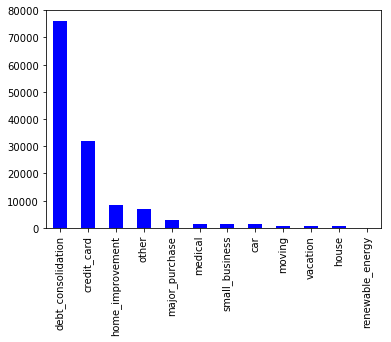

Loan Grade
B    39999
C    36498
A    26324
D    16267
E     9419
F     3430
G      874
Name: grade, dtype: int64
Axes(0.125,0.125;0.775x0.755)


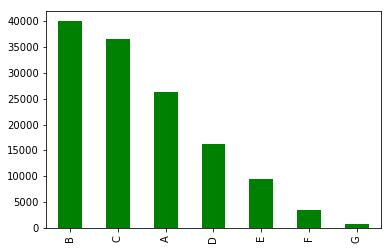

Years of Employment
10+ years    45938
2 years      11777
3 years      10664
< 1 year     10007
Unknown       8745
1 year        8647
5 years       8009
4 years       7739
8 years       6287
6 years       5332
9 years       5170
7 years       4424
n/a             72
Name: emp_length, dtype: int64
Axes(0.125,0.125;0.775x0.755)


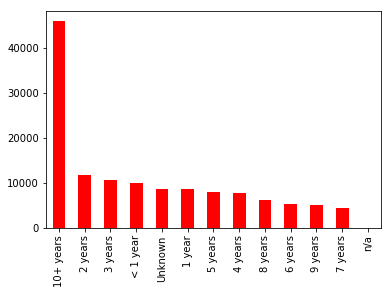

Living Arrangement
MORTGAGE    66259
RENT        50514
OWN         16038
Name: home_ownership, dtype: int64
Axes(0.125,0.125;0.775x0.755)


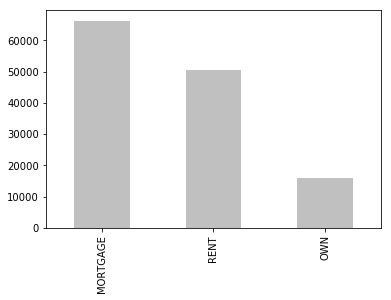

Verification Status
Source Verified    50003
Not Verified       46778
Verified           36030
Name: verification_status, dtype: int64
Axes(0.125,0.125;0.775x0.755)


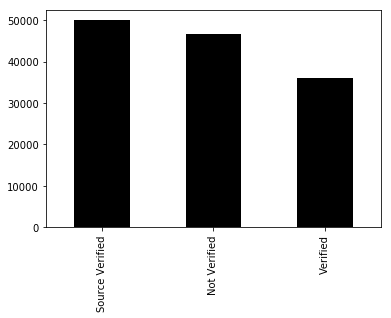

Loan Status
Current               63794
Fully Paid            48121
Charged Off           17651
Late (31-120 days)     1884
In Grace Period         912
Late (16-30 days)       444
Default                   5
Name: loan_status, dtype: int64
Axes(0.125,0.125;0.775x0.755)


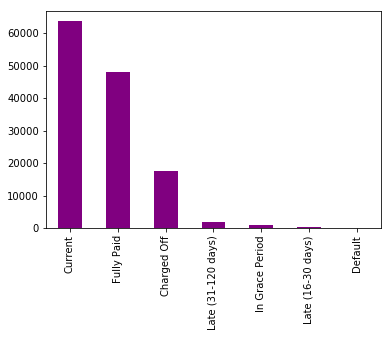

In [91]:
#let's find out the different loan purposes. let's put this code into a function so that we can do multiple plots quickly
print("Purpose of Loans")
print(loan_subset['purpose'].value_counts())
print(loan_subset['purpose'].value_counts().plot(kind = 'bar', color = 'blue'))
plt.show()
#it appears that the vast majority of loans are taken out for debt consolidation


print("Loan Grade")
print(loan_subset['grade'].value_counts())
print(loan_subset['grade'].value_counts().plot(kind = 'bar', color = 'green'))
plt.show()

print("Years of Employment")
print(loan_subset['emp_length'].value_counts())
print(loan_subset['emp_length'].value_counts().plot(kind = 'bar', color = 'red'))
plt.show()


print("Living Arrangement")
print(loan_subset['home_ownership'].value_counts())
print(loan_subset['home_ownership'].value_counts().plot(kind = 'bar', color = 'silver'))
plt.show()

print("Verification Status")
print(loan_subset['verification_status'].value_counts())
print(loan_subset['verification_status'].value_counts().plot(kind = 'bar', color = 'black'))
plt.show()


print("Loan Status")
print(loan_subset['loan_status'].value_counts())
print(loan_subset['loan_status'].value_counts().plot(kind = 'bar', color = 'purple'))
plt.show()